In [1]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
import numpy as np
import cv2
from stardist.models import StarDist2D
import os

model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [81]:
path = "C:/Users/Modern/Desktop/Science stuff from the USB/21-12-2022 Spheroids/48H Glycerol/Image/10.tif"
mylist = []
loaded,layers = cv2.imreadmulti(mats = mylist, filename = path, flags = cv2.IMREAD_ANYCOLOR )
z,x,y,c = np.shape(layers)


114


In [98]:
labels = np.empty([z,x,y])
i = 0
# layer = layers[50]
# image = layer[:,:,1]
# label, _ = model.predict_instances(normalize(image))

for l in layers:
    image = l[:,:,1]
    label, _ = model.predict_instances(normalize(image))
    labels[i,:,:] = label
    i = i+1

1/1 [==============================] - 0s 119ms/step


Text(0.5, 1.0, 'prediction + input overlay')

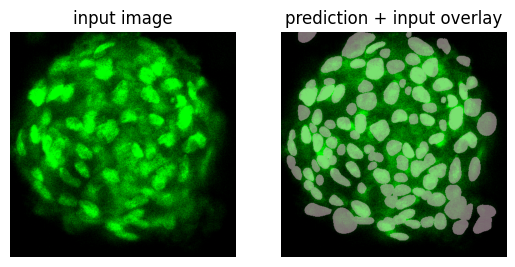

In [99]:

plt.subplot(1,2,1)
plt.imshow(layers[50], cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels[50], layers[50]))
plt.axis("off")
plt.title("prediction + input overlay")

